Model-driven strategies have long been the classic framework to address the derivation of governing equations. However, the ever increasing availability of large-scale observation and simulation datasets makes more and more appealing the development of data-driven strategies especially when dealing with computationally-demanding models or phenomenons with high modeling uncertainties. 

The use of a given identification scheme is strongly conditioned by the nature of the provided observations. In this context, let us start by introducing the following state space model formulation

\begin{equation}
\left \{
\begin{array}{ccl}
\dot{{z}_{t}} &= {f}({z}_{t}, \eta_t)\\
{x}_{t} &= \mathcal{H}({z}_{t},\epsilon_{t})
\label{eq:C10_SSM}
\end{array}\right.
\end{equation}

where $z \in \mathbb{R}^{s}$ and $x \in \mathbb{R}^{n}$ represent the hidden state variables and the observations respectively, $f$ and $\mathcal{H}$ the dynamical and observation models. $\eta_t$ and $\epsilon_{t}$ are random process accounting for the uncertainties in the dynamical and observation models respectively. 

In an identification scenario, neither the dynamical model $f_{\theta}$, nor the state variables ${z}$ are known. Instead, we are only provided with the observations ${x}$ that are related in some way to the hidden states through the observation operator $\mathcal{H}$ and the noise $\epsilon$. Furthermore, the dynamical model noise $\eta_t$ can account for either i) errors in modeling a deterministic real phenomenon or ii) stochastic variability of the data. In the latter case, deterministic modeling techniques can only express the variability of the mean component and stochastic identification techniques need to be used. In this work however, we mostly focus on deterministic representations and we assume for the rest of this section that the noise $\eta$ can be neglected i.e. $\eta = 0$. 

Depending on the nature of the observation operator $\mathcal{H}$ and the noise $\epsilon$, several data-driven schemes could be considered. In this context, this notebook we will introduce a some considerations regarding the provided observations and the corresponding identification technique.

# 1) Data generation

In [1]:
from Generate_data import generate_data
import numpy as np
import matplotlib.pyplot as plt
import torch
from scipy.integrate import odeint
from utils import RMSE
from tqdm import tqdm

In [2]:
# dataset parameters
class GD:
    model = 'Lorenz_96'
    class parameters:
        F = 8
        J = 40
    dt_integration = 0.01 # sampling time
    nb_loop_train = 100.01 #7500.1 # size of the catalog
    nb_loop_test = 100 # size of the true state and noisy observations
    sigma2_catalog = 0.0 # variance of the model error to generate the catalog
    
# run the data generation
catalog, xt = generate_data(GD)
# catalog is the true states zt, it containts a time sliced data base : 
# catalog.analogs    == zt
# catalog.successors == zt+n*dt_integration
# xt is the test set

<Figure size 360x360 with 0 Axes>

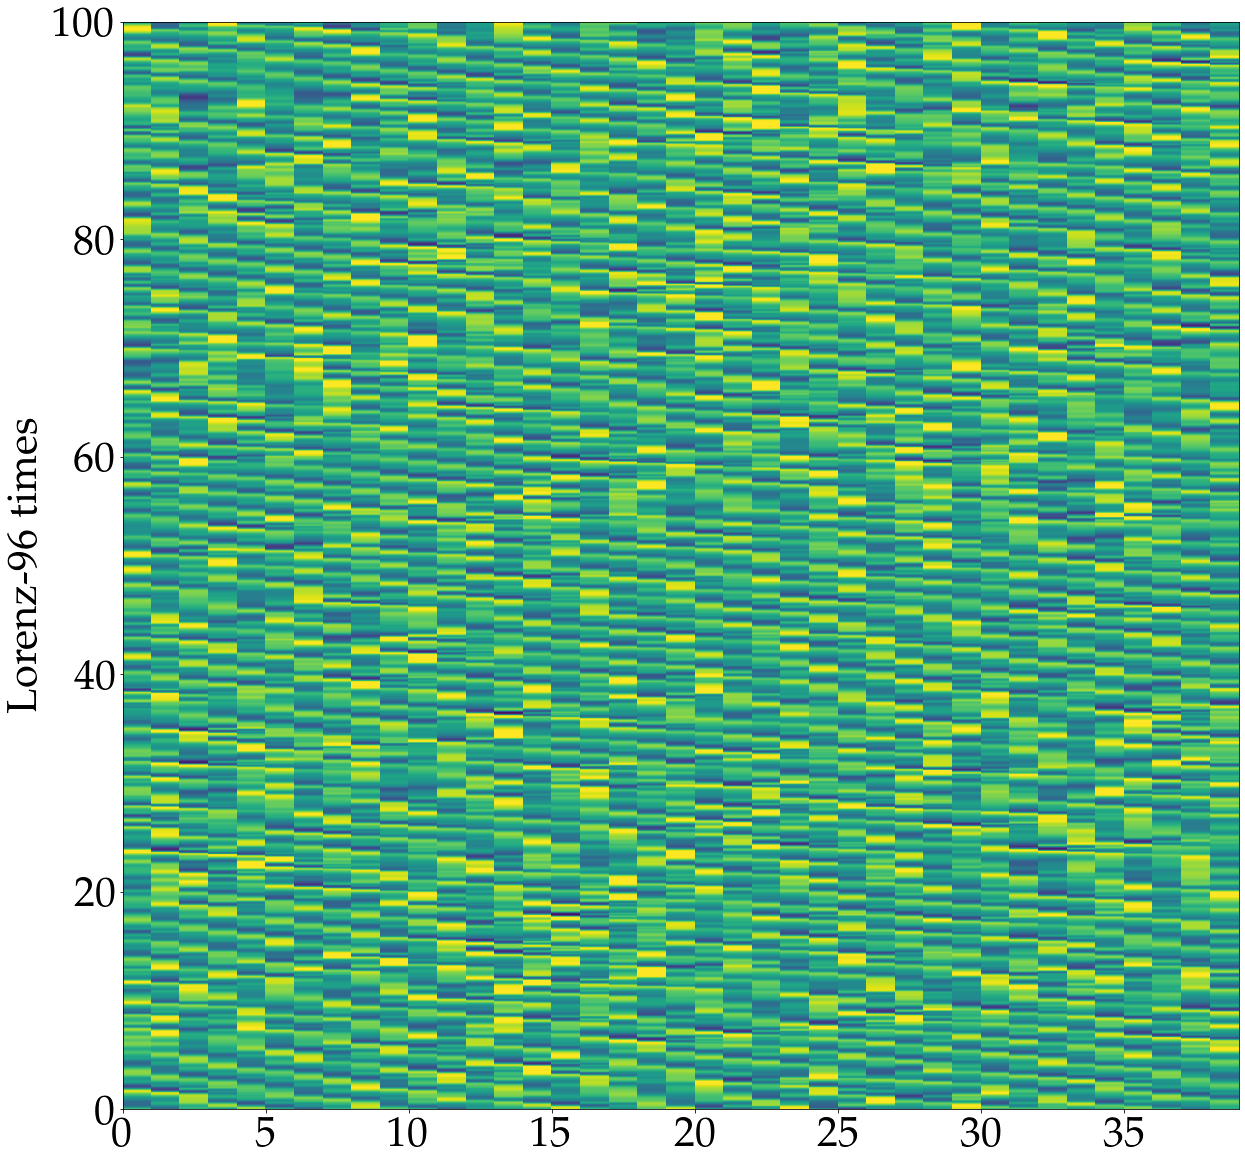

In [3]:
import matplotlib as mpl
plt.rcParams["mathtext.fontset"] = "cm"
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 42})
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
## for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
plt.figure(figsize=(5,5))
[X,Y]= np.meshgrid(range(40),np.linspace(0,catalog.analogs.shape[0]*GD.dt_integration,catalog.analogs.shape[0]+1))
plt.figure(figsize=(20,20))
plt.pcolor(X,Y,catalog.analogs);
plt.xlim([0,40-1]);
plt.clim([-10,10]);
plt.ylabel('Lorenz-96 times');